# Diffusion

This notebook illustrates the ranking of the nodes of a graph by [diffusion](https://scikit-network.readthedocs.io/en/latest/reference/ranking.html#diffusion).

In [ ]:
from IPython.display import SVG

In [2]:
import numpy as np

In [ ]:
from sknetwork.data import karate_club, painters, movie_actor
from sknetwork.ranking import Diffusion, BiDiffusion
from sknetwork.visualization import svg_graph, svg_digraph, svg_bigraph

## Graphs

**Loading**

In [3]:
graph = karate_club(metadata=True)
adjacency = graph.adjacency
position = graph.position
labels_true = graph.labels

<34x34 sparse matrix of type '<class 'numpy.int64'>'
	with 156 stored elements in Compressed Sparse Row format>

**Ranking**

In [5]:
diffusion = Diffusion()
scores = diffusion.fit_transform(adjacency, {1: 0, 2: 1})

Diffusion(solver='lsqr')

**Visualization**

In [7]:
image = svg_graph(adjacency, position, scores=scores)

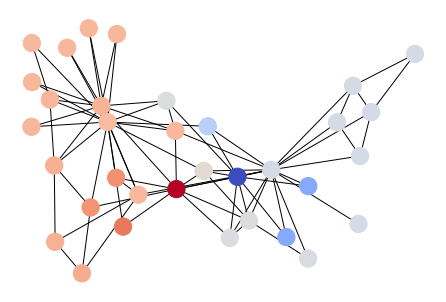

In [8]:
SVG(image)

## Digraphs

**Loading**

In [10]:
graph = painters(metadata=True)
adjacency = graph.adjacency
position = graph.position
names = graph.names

<14x14 sparse matrix of type '<class 'numpy.int64'>'
	with 50 stored elements in Compressed Sparse Row format>

**Ranking**

In [11]:
picasso = 0
monet = 1

In [12]:
diffusion = Diffusion()
scores = diffusion.fit_transform(adjacency, {picasso: 0, monet: 1})

Diffusion(solver='lsqr')

**Visualization**

In [14]:
image = svg_digraph(adjacency, position, names, scores=scores)

In [ ]:
SVG(image)

## Bigraphs

**Loading**

In [16]:
graph = movie_actor(metadata=True)
biadjacency = graph.biadjacency
names_row = graph.names_row
names_col = graph.names_col

<15x16 sparse matrix of type '<class 'numpy.int64'>'
	with 41 stored elements in Compressed Sparse Row format>

**Ranking**

In [17]:
bidiffusion = BiDiffusion()

In [18]:
drive = 3
aviator = 9

In [19]:
bidiffusion.fit(biadjacency, personalization={drive: 1, aviator: 2})
scores_row = bidiffusion.scores_row_
scores_col = bidiffusion.scores_col_

Diffusion(solver='lsqr')

**Visualization**

In [21]:
image = svg_bigraph(biadjacency, names_row, names_col, scores_row=scores_row, scores_col=scores_col)

In [22]:
SVG(image)